# Download dataset

In [1]:
import wget
import os
import shutil
import zipfile

if not os.path.exists('../data/osfstorage-archive.zip'):
    wget.download('https://files.de-1.osf.io/v1/resources/2395t/providers/osfstorage/?zip=')

if not os.path.exists('../data'):
    os.mkdir('../data')

if os.path.exists('osfstorage-archive.zip'):
    shutil.move('osfstorage-archive.zip','../data/osfstorage-archive.zip')

with zipfile.ZipFile('../data/osfstorage-archive.zip', 'r') as zip_ref:
    zip_ref.extractall('../data')

# Load unstimulated dataset

In [51]:
import mat73
import numpy as np
all_data = {}

#No stimulation
data = mat73.loadmat('../data/WT_NoStim.mat')
data = data['WT_NoStim']
traces = data['deltaFOverF_bc'] #neural activity traces corrected for bleaching
#t = data['timeVectorSeconds'] #seconds
fps = data['fps'] #fps
states_raw = data['States']

names = data['NeuronNames']
names[3][-1] = names[3][-1][0] #correct an entry
common_neurons = list(set.intersection(*map(set, names)))
inds = [[i for i, n in enumerate(name) if n in common_neurons] for name in names]

#number states numerically (easier to visualise)
states=[]
for i, tr in enumerate(traces):
    states.append(np.zeros(len(tr)))
    for j, s in enumerate(states_raw[i].keys()):
        states[-1] += states_raw[i][s]*j
    states[-1] = states[-1].astype(int)

n = len(traces)

#‘FWD’ forward crawling, ‘SLOW’ forward slowing, ‘DT’ dorsal post reversal turn, ‘VT’ ventral post reversal turn
#‘REV1’ reverse crawling, ‘REV2’ reverse crawling, ‘REVSUS’ sustained reverse crawling, ‘NOSTATE’ - ambiguous

# Take only common neurons

In [54]:
traces = [tr[:,inds[i]] for i, tr in enumerate(traces)]
states = [st[inds[i]] for i, st in enumerate(states)]

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
PCA = pca.fit(traces[0])

traces_pca = [PCA.transform(tr) for tr in traces]

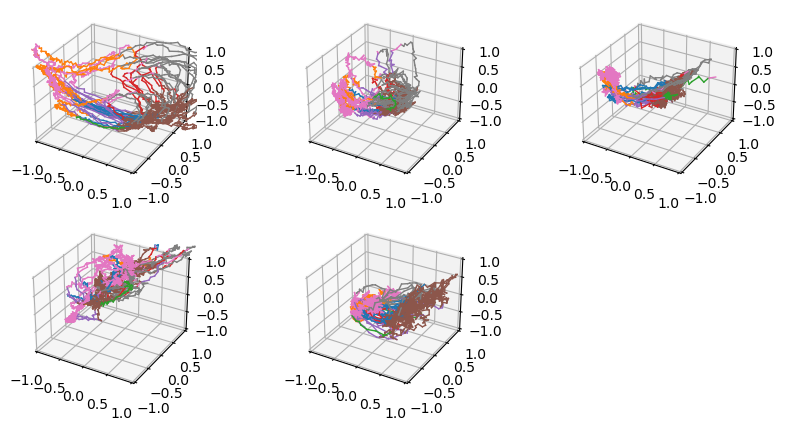

In [98]:
from MARBLE import plotting
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

for i in range(n):
    ax = fig.add_subplot(2,3,i+1, projection='3d')
    plotting.trajectories(traces_pca[i], ax=ax, style='-', node_feature=states[i])
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])

# Load stimulated dataset

In [101]:
all_data = {}

#No stimulation
data = mat73.loadmat('../data/WT_Stim.mat')
data = data['WT_Stim']
traces = data['traces'] #neural activity traces corrected for bleaching
#t = data['timeVectorSeconds'] #seconds
fps = data['fps'] #fps
states_raw = data['States']

names = data['IDs']
names[3][-1] = names[3][-1][0] #correct an entry
common_neurons = list(set.intersection(*map(set, names)))
inds = [[i for i, n in enumerate(name) if n in common_neurons] for name in names]

#number states numerically (easier to visualise)
states=[]
for i, tr in enumerate(traces):
    states.append(np.zeros(len(tr)))
    for j, s in enumerate(states_raw[i].keys()):
        states[-1] += states_raw[i][s]*j
    states[-1] = states[-1].astype(int)

n = len(traces)

#‘FWD’ forward crawling, ‘SLOW’ forward slowing, ‘DT’ dorsal post reversal turn, ‘VT’ ventral post reversal turn
#‘REV1’ reverse crawling, ‘REV2’ reverse crawling, ‘REVSUS’ sustained reverse crawling, ‘NOSTATE’ - ambiguous

TypeError: unhashable type: 'list'

In [111]:
data

{'IDs': [[None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   ['IL1DR', 'URYDR'],
   None,
   None,
   None,
   None,
   ['IL1DL', 'URYDL'],
   ['OLQDR', 'URYDR'],
   ['OLQVR', 'URYVR'],
   ['OLQVL', 'URYVL'],
   ['OLQDL', 'URYDL'],
   None,
   None,
   ['BAGL'],
   ['BAGR'],
   ['RMED'],
   ['RMEL'],
   None,
   None,
   ['RID'],
   None,
   None,
   ['RMEV'],
   ['ASKR'],
   [array([0, 0], dtype=uint64), 'AFDL', 'ASKL'],
   ['AVAL'],
   None,
   ['ASKL', 'AFDL'],
   ['URXL', 'URXR'],
   ['ALA'],
   None,
   None,
   None,
   None,
   ['AVEL'],
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   ['RIVL', 'AVHL', 'AVJL'],
   ['AIBR'],
   None,
   ['AVBL'],
   ['AIBL'],
   None,
   ['RIMR'],
   None,
   None,
   None,
   ['RIBL'],
   None,
   None,
   ['RIBR'],
   None,
   ['SMBDR', array([0, 0], dtype=uint64)],
   ['RIML'],
   None,
   None,
   None,
   None,
   None,
   None,
   N